In [162]:
%reload_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import numpy as np
import torch
import torchvision
import librosa
import librosa.display
from pathlib import Path
import librosa_transforms
from librosa_transforms import MFCC, MelSpectrogram, Spectrogram, LogPowerSpectrogram, PadTrim
import sklearn

In [200]:
DATA_DIR = Path('/home/workfit/Sylvain/Data/free-spoken-digit-dataset/recordings')
fn = DATA_DIR / "7_nicolas_34.wav"

X, sr = librosa.load(fn)
y = ['seven']
sample = {'X': torch.tensor(X), 'y': y}
print(sr)

22050


## Waveform / STFT

Text(0.5, 1.0, 'Waveform')

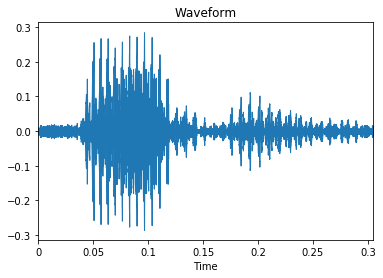

In [190]:
librosa.display.waveplot(sample['X'].numpy(), sr)
plt.title('Waveform')

Text(0.5, 1.0, 'Log Spectrogram')

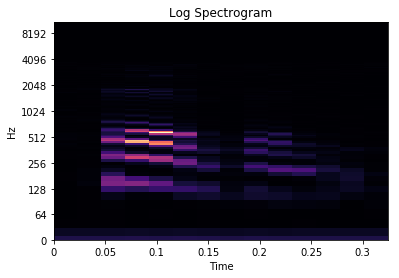

In [205]:
spectrogram = librosa.stft(sample['X'].numpy(), n_fft=1024, hop_length = 512)
librosa.display.specshow(spectrogram, y_axis='log', x_axis='time');
plt.title('Log Spectrogram')

## Log power spectrogram

In [181]:
logpow = LogPowerSpectrogram(n_fft=1024, hop_length = 512)
logpow_sample = logpow(sample)

In [176]:
logpow_sample['X'].shape

torch.Size([1025, 14])

Text(0.5, 1.0, 'Log Spectrogram')

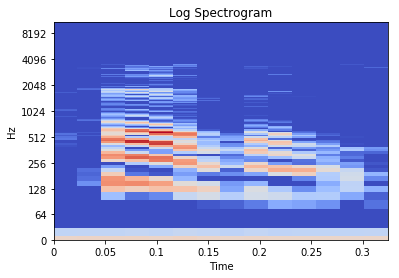

In [204]:
librosa.display.specshow(logpow_sample['X'].numpy(), sr=sr, x_axis='time' ,y_axis='log')
plt.title('Log Spectrogram')

## Mel spectrogram

- Take the Fourier transform of (a windowed excerpt of) a signal.
- Map the powers of the spectrum obtained above onto the mel scale, using triangular overlapping windows.

In [91]:
melspec = MelSpectrogram(sr)

In [92]:
melspec_sample = melspec(sample)

In [93]:
melspec_sample['X'].shape

torch.Size([128, 14])

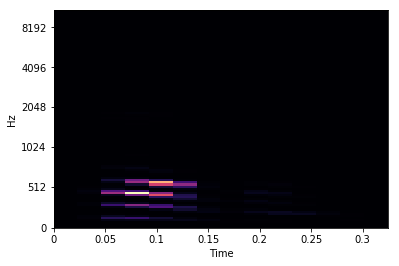

In [157]:
librosa.display.specshow(melspec_sample['X'].numpy(), sr=sr, y_axis='mel', x_axis='time')

In [95]:
X_db = librosa.power_to_db(melspec_sample['X'].numpy())

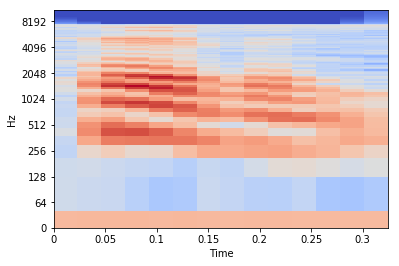

In [209]:
librosa.display.specshow(X_db, sr=sr, x_axis='time', y_axis='log')

## MFCC

MFCCs are derived from mel spectrogram:

- Take the logs of the powers at each of the mel frequencies.
- Take the discrete cosine transform of the list of mel log powers

The MFCCs are the amplitudes of the resulting spectrum.

In [193]:
mfcc = MFCC(sr)
mfcc_sample = mfcc(sample)

In [194]:
mfcc_sample['X'].shape

torch.Size([13, 14])

Text(0.5, 1.0, 'MFCC')

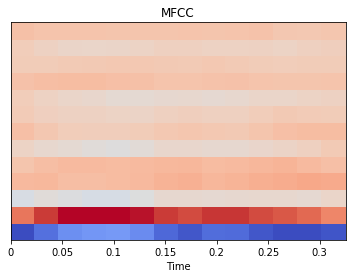

In [195]:
librosa.display.specshow(mfcc_sample['X'].numpy(), sr=sr, x_axis='time')
plt.title('MFCC')

### scale features

In [196]:
mfccs = sklearn.preprocessing.scale(mfcc_sample['X'].numpy(), axis=1)

Text(0.5, 1.0, 'Scaled MFCC')

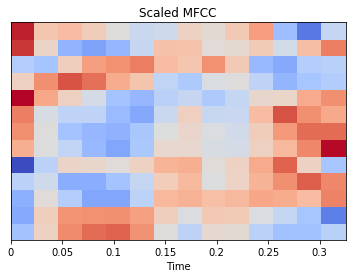

In [197]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.title('Scaled MFCC')

## Padding/triming (same length input)

In [144]:
DATA_DIR = Path('/home/workfit/Sylvain/Data/free-spoken-digit-dataset/recordings')
fn = DATA_DIR / "9_nicolas_34.wav"

X, sr = librosa.load(fn)
y = ['9']
sample2 = {'X': torch.tensor(X), 'y': y}

In [145]:
melspec_sample2 = melspec(sample2)

In [147]:
melspec_sample2['X'].numpy().shape

(128, 18)

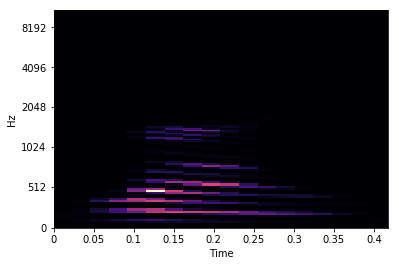

In [220]:
librosa.display.specshow(melspec_sample2['X'].numpy(), sr=sr, x_axis='time', y_axis='mel')

In [148]:
audio = sample['X']
audio.shape

torch.Size([6726])

In [40]:
len(audio.numpy())

6726

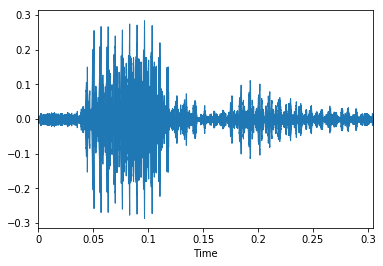

In [217]:
librosa.display.waveplot(sample['X'].numpy(), sr)

In [149]:
padder = PadTrim(10000)

In [151]:
padded = padder(sample)

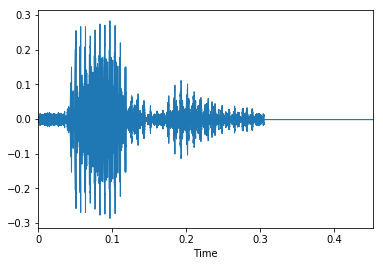

In [219]:
librosa.display.waveplot(padded['X'].numpy(), sr)

## Compose transforms (pad + melspec)

In [210]:
composed = torchvision.transforms.Compose([PadTrim(10000), MelSpectrogram(sr)])

In [211]:
print(composed)

Compose(
    PadTrim(max_len=10000, fill_value=0.0)
    MelSpectrogram(sr=22050, hop_length=512, n_mels=128)
)


In [212]:
padded_spec = composed(sample)

In [215]:
print(padded_spec['X'].shape)
print(melspec_sample['X'].shape)

torch.Size([128, 20])
torch.Size([128, 14])


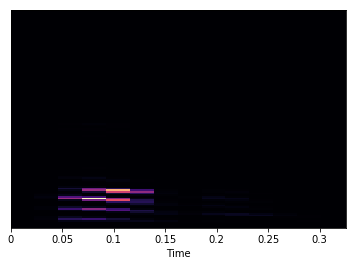

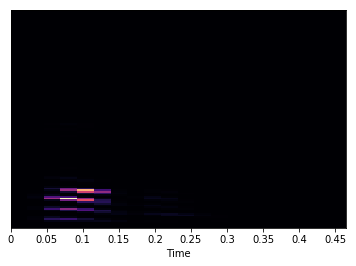

In [216]:
plt.figure()
librosa.display.specshow(melspec_sample['X'].numpy(), sr=sr, x_axis='time')
plt.figure()
librosa.display.specshow(padded_spec['X'].numpy(), sr=sr, x_axis='time')